# Swiss road accidents 2011 - 2015

Data source: [Federal Roads Office (FEDRO)](http://www.astra.admin.ch/?lang=en)

Analysing every road accident in Switzerland from 2011 to 2015 using Pandas.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

Importing files on accidents, .csv Files, organised by year

In [61]:
unfaelle2011 = pd.read_csv("Export_1_Unfallblatt_2011.csv", delimiter = ";", encoding = "latin-1")
unfaelle2012 = pd.read_csv("Export_1_Unfallblatt_2012.csv", delimiter = ";", encoding = "latin-1")
unfaelle2013 = pd.read_csv("Export_1_Unfallblatt_2013.csv", delimiter = ";", encoding = "latin-1")
unfaelle2014 = pd.read_csv("Export_1_Unfallblatt_2014.csv", delimiter = ";", encoding = "latin-1")
unfaelle2015 = pd.read_csv("Export_1_Unfallblatt_2015.csv", delimiter = "\t", encoding = "UTF-8")

Importing files on people involved in accidents, .csv Files, organised by year

In [62]:
personen2011 = pd.read_csv("Export_3_Personenblatt_2011.csv", delimiter = ";", encoding = "latin-1")
personen2012 = pd.read_csv("Export_3_Personenblatt_2012.csv", delimiter = ";", encoding = "latin-1")
personen2013 = pd.read_csv("Export_3_Personenblatt_2013.csv", delimiter = ";", encoding = "latin-1")
personen2014 = pd.read_csv("Export_3_Personenblatt_2014.csv", delimiter = ";", encoding = "latin-1")
personen2015 = pd.read_csv("Export_3_Personenblatt_2015.csv", delimiter = "\t", encoding = "UTF-8")

Importing files on vehicles involved in accidents, .csv Files, organised by year

In [63]:
fahrzeuge2011 = pd.read_csv("Export_2_Objektblatt_2011.csv", delimiter = ";", encoding = "latin-1")
fahrzeuge2012 = pd.read_csv("Export_2_Objektblatt_2012.csv", delimiter = ";", encoding = "latin-1")
fahrzeuge2013 = pd.read_csv("Export_2_Objektblatt_2013.csv", delimiter = ";", encoding = "latin-1")
fahrzeuge2014 = pd.read_csv("Export_2_Objektblatt_2014.csv", delimiter = ";", encoding = "latin-1")
fahrzeuge2015 = pd.read_csv("Export_2_Objektblatt_2015.csv", delimiter = "\t", encoding = "UTF-8")

Concatenating the files

In [64]:
df_unfaelle = pd.concat([unfaelle2011, unfaelle2012, unfaelle2013, unfaelle2014, unfaelle2015], ignore_index=True)
df_personen = pd.concat([personen2011, personen2012, personen2013, personen2014, personen2015], ignore_index=True)
df_fahrzeuge = pd.concat([fahrzeuge2011, fahrzeuge2012, fahrzeuge2013, fahrzeuge2014, fahrzeuge2015], ignore_index=True)

In [180]:
#df_unfaelle.columns

In [181]:
#df_personen.columns

In [182]:
#df_fahrzeuge.columns
#contains the "Hauptverursacher UAP" (ja/nein) category

# Contents

**OVERVIEW**
1. Total number of road accidents in Switzerland since 2011? How have they developed over the years? Make a bar graph. 
2. On which day of the week do the most accidents occur? And at what time of day? Make a graph of that as well.
3. Compare the various vehicle categories involved in accidents. Total and by year.
4. What was the most expensive crash in the past five years? Where was it? And which crash one was the most deadly?
5. How many accidents occured on roads without ligthing?
6. How have drug and alcohol related accidents developed in the past 5 years?
7. Are more or less crash drivers tested in breath tests 2011 through to 2015?
8. What ist the average age of crash drivers? Overall? And how has it changed over the years?
9. What about female vs. male drivers?
10. List the 10 accident hotspots in Switzerland?

** 1. Total number of road accidents in Switzerland since 2011? How have they developed over the years? Make a bar graph.**

In [68]:
df_unfaelle['Unfall-UID'].count()

266483

In [69]:
df_unfaelle.groupby('Jahr')['Unfall-UID'].count()

Jahr
2011    54269
2012    54171
2013    53052
2014    51756
2015    53235
Name: Unfall-UID, dtype: int64

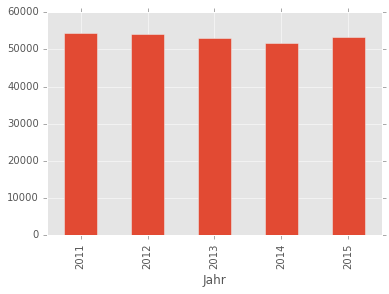

In [70]:
df_unfaelle.groupby('Jahr')['Unfall-UID'].count().plot(kind='bar')
plt.savefig("Unfaelle_pro_Jahr.svg")
plt.savefig("Unfaelle_pro_Jahr.png")

Most recently there has been a slight increase in road accidents in Switzerland.

** 2. On which day of the week do the most accidents occur? And at what time of day? Make graph of that as well.**

In [183]:
df_unfaelle['Wochentag-Nr'].value_counts()

5    43687
4    39969
3    39209
2    38617
6    38540
1    37634
7    28827
Name: Wochentag-Nr, dtype: int64

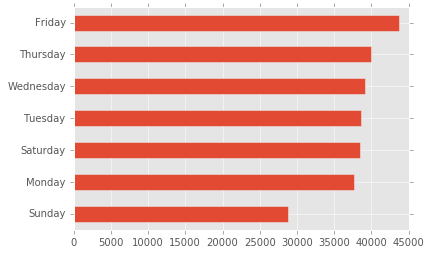

In [184]:
df_unfaelle['Wochentag-Nr'].astype(str).str.replace('6', "Saturday").str.replace('4', "Thursday").str.replace('1', "Monday").str.replace('2', "Tuesday").str.replace('3', "Wednesday").str.replace('5', "Friday").str.replace('7', "Sunday").value_counts(ascending=True).plot(kind='barh')
plt.savefig("Unfaelle_pro_Tag.svg")
plt.savefig("Unfaelle_pro_Tag.png")

In [185]:
plt.savefig("Unfaelle_pro_Tag.svg")
plt.savefig("Unfaelle_pro_Tag.png")

**Transforming the data into times is proving a problem. They need to be transformed, so I can make a histogram of the times. With time as X-axis and count of accidents corresponding to the time on Y-xis.** This post on timestamps in Pandas may be of some [help](http://pandas.pydata.org/pandas-docs/stable/timeseries.html).

In [186]:
#df_unfaelle['Unfallzeit'].value_counts(ascending=False).hist(kind='scatter', x=)
#df_unfaelle['Unfallzeit'].value_counts().plot(kind='barh', x=['Unfallzeit'])
#df_unfaelle['Unfallzeit_Double'] = df_unfaelle['Unfallzeit']
df_unfaelle['Unfallzeit'].value_counts().head(4)

unbekannt    3024
17:00        2420
18:00        2297
17:30        2290
Name: Unfallzeit, dtype: int64

**3. Compare the top ten various vehicle categories involved in accidents. Total and by year.**

In [187]:
df_fahrzeuge['Fahrzeugart UAP'].value_counts().head(5)
#money_players = nba[nba['2013 $'] != 'n/a']

|710|    310440
|712|     22099
|733|     21517
|730|     14451
|725|      9724
Name: Fahrzeugart UAP, dtype: int64

The "|" sign ist causing a lot of problems as it doesn't allow me to change the names of the numbers in one go. And I haven't figures out how to do it in two goes.

In [188]:
#df_fahrzeuge['Fahrzeugart UAP'].astype(str).str.replace('|', "").value_counts(ascending=False)
#vehicles_without_pipes.astype(str).str.replace('710', "Cars").value_counts(ascending=False).head(10)
test = df_fahrzeuge['Fahrzeugart UAP'].astype(str).str.replace('|', "").value_counts(ascending=False)
pd.DataFrame(test).head(10)
#test['Fahrzeugart UAP']
#test['Fahrzeugart UAP'].astype(str).str.replace('712', "Vans")
#test.columns()

#.str.replace('712', "Vans").str.replace('733', "n/a").str.replace('730', "Bicycles").str.replace('725', "Motorbikes, above 25kw").str.replace('718', "Trucks, above 7,4t").str.replace('722', "Mopeds").str.replace('724', "Motorbike, to 25kw").str.replace('720', "Semi trailer, above 7,5t").

,Fahrzeugart UAP
710,310440
712,22099
733,21517
730,14451
nan,13253
725,9724
718,7061
723,6171
722,4723
724,4636


**4. What was the most expensive crash in the past five years? Where was it? And which crash one was the most deadly?**

In [190]:
df_unfaelle.sort_values('Total geschätzter Sachschaden (in 1000 CHF)', ascending=False)[['Total geschätzter Sachschaden (in 1000 CHF)', 'Datum', 'x-Koordinate', 'y-Koordinate', 'Kanton Kürzel', 'Aktuelle BFS Gemeinde-Nr']].head(5)

,Total geschätzter Sachschaden (in 1000 CHF),Datum,x-Koordinate,y-Koordinate,Kanton Kürzel,Aktuelle BFS Gemeinde-Nr
102850,3097.0,2012/11/26 00:00:00,733188,264855,TG,4501.0
125924,2113.8,2013/05/06 00:00:00,753599,261346,SG,3213.0
14218,2000.0,2011/04/14 00:00:00,577759,183068,FR,2196.0
232322,1801.0,20.05.15,772188,201408,GR,NaN
150309,1730.0,2013/10/17 00:00:00,685914,252395,ZH,69.0


The accident causing the greatest damage, 3 Million Swiss Francs, happened on 26 October 2012 in Canton Thurgau, [here](https://tools.retorte.ch/map/?swissgrid=2733188,1264855), or [here](https://goo.gl/maps/5x12FYvzK4D2) on Google Maps. 

In [177]:
df_unfaelle.sort_values('Getötete', ascending=False)[['Getötete', 'Datum', 'x-Koordinate', 'y-Koordinate', 'Kanton Kürzel', 'Aktuelle BFS Gemeinde-Nr']].head(5)

,Getötete,Datum,x-Koordinate,y-Koordinate,Kanton Kürzel,Aktuelle BFS Gemeinde-Nr
64358,28,2012/03/13 00:00:00,607075,125901,VS,6248.0
252202,5,26.09.15,627775,267992,AG,NaN
90121,4,2012/09/03 00:00:00,570220,186565,FR,2024.0
139561,3,2013/08/04 00:00:00,663813,199798,OW,1401.0
235187,3,07.06.15,747298,159066,GR,NaN


The most deadly [accident](https://de.wikipedia.org/wiki/Busunfall_im_Sierre-Tunnel) was a bus accident involving mostly school kids from Belgien. And [this one](http://www.zentralplus.ch/de/news/politik/4337876/RheinfeldenAG-5-Tote-bei-Selbstunfall.htm) more recently. 

**5. How many accidents occured on roads without ligthing? (Maybe even work out an accident hotspot?**

In [ ]:
Strassenbeleuchtung UAP 640 keine 641 ausser Betrieb

In [215]:
df_unfaelle[(df_unfaelle['Lichtverhältnis UAP'] == 622) & (df_unfaelle['Strassenbeleuchtung UAP'] == 640)]


#df[(df['animal'] == 'cat') & (df['inches'] > 12)]

#df[df['feet'] > 6.5]

,Aktuelle BFS Gemeinde-Nr,Bahnübergang UAP,Bahnübergang Zusatz UAP,Datum,Getötete,Hauptursache UAP,Höchstgeschwindigkeit,Höchstgeschwindigkeit Zusatz UAP,Innerorts / Ausserorts UAP,Jahr,...,Verkehrsregelung UAP,Verkehrsregelung Zusatz UAP,Vortrittsregelung UAP,Witterung UAP,Witterung Zusatz UAP,Wochentag-Nr,Zonensignalisation UAP,unverletzte Personen,x-Koordinate,y-Koordinate
3,1373.0,570,NaN,2011/01/01 00:00:00,0,1101,120,NaN,411,2011,...,600,NaN,490,581,NaN,6,460,1,687222,211352
7,3947.0,570,NaN,2011/01/01 00:00:00,0,2304,120,NaN,411,2011,...,600,NaN,490,580,NaN,6,460,1,760785,203761
8,3822.0,570,NaN,2011/01/01 00:00:00,0,1105,80,NaN,411,2011,...,600,NaN,490,580,NaN,6,460,2,737920,142515
10,567.0,570,NaN,2011/01/01 00:00:00,0,1101,50,NaN,410,2011,...,600,NaN,490,580,NaN,6,460,1,619753,163226
15,611.0,570,NaN,2011/01/01 00:00:00,0,1704,100,NaN,411,2011,...,600,NaN,490,581,NaN,6,460,2,611296,184402
19,1009.0,570,NaN,2011/01/01 00:00:00,0,4202,80,NaN,411,2011,...,600,NaN,490,580,NaN,6,460,5,652008,208059
27,5006.0,570,NaN,2011/01/01 00:00:00,0,1101,120,NaN,411,2011,...,600,NaN,490,580,NaN,6,460,1,721281,123208
33,768.0,570,NaN,2011/01/01 00:00:00,0,4403,100,NaN,411,2011,...,600,NaN,490,581,NaN,6,460,8,617763,170253
47,6623.0,570,NaN,2011/01/01 00:00:00,0,9101,50,NaN,410,2011,...,600,NaN,490,580,NaN,6,460,1,497441,120777
49,587.0,570,NaN,2011/01/01 00:00:00,0,1599,50,NaN,410,2011,...,600,NaN,490,581,NaN,6,460,1,632572,169665


In [216]:
df_unfaelle[(df_unfaelle['Lichtverhältnis UAP'] == 622) & (df_unfaelle['Strassenbeleuchtung UAP'] == 641)]

,Aktuelle BFS Gemeinde-Nr,Bahnübergang UAP,Bahnübergang Zusatz UAP,Datum,Getötete,Hauptursache UAP,Höchstgeschwindigkeit,Höchstgeschwindigkeit Zusatz UAP,Innerorts / Ausserorts UAP,Jahr,...,Verkehrsregelung UAP,Verkehrsregelung Zusatz UAP,Vortrittsregelung UAP,Witterung UAP,Witterung Zusatz UAP,Wochentag-Nr,Zonensignalisation UAP,unverletzte Personen,x-Koordinate,y-Koordinate
53,5938.0,570,NaN,2011/01/01 00:00:00,0,1101,50,NaN,410,2011,...,600,NaN,490,581,NaN,6,460,2,538143,180329
116,5397.0,570,NaN,2011/01/02 00:00:00,0,4503,50,NaN,410,2011,...,600,NaN,492,580,NaN,7,460,1,712911,112584
119,1349.0,570,NaN,2011/01/02 00:00:00,0,1709,60,NaN,411,2011,...,600,NaN,490,581,NaN,7,460,1,709151,227837
167,62.0,570,NaN,2011/01/02 00:00:00,0,4102,100,NaN,411,2011,...,600,NaN,490,581,NaN,7,460,1,685331,256034
523,4851.0,570,NaN,2011/01/06 00:00:00,0,4102,50,NaN,410,2011,...,600,NaN,490,584,NaN,4,460,1,721700,281414
965,5886.0,570,NaN,2011/01/09 00:00:00,0,1701,50,NaN,410,2011,...,600,NaN,490,582,NaN,7,460,1,559379,142905
1139,96.0,570,NaN,2011/01/10 00:00:00,0,4603,50,NaN,410,2011,...,600,NaN,490,581,NaN,1,460,2,678088,254964
1367,5586.0,570,NaN,2011/01/12 00:00:00,0,1101,50,NaN,410,2011,...,600,NaN,490,582,NaN,3,460,4,535938,153236
1484,4436.0,570,NaN,2011/01/13 00:00:00,0,4505,50,NaN,410,2011,...,600,NaN,499,582,NaN,4,460,1,745205,269557
1495,3103.0,570,NaN,2011/01/13 00:00:00,0,1101,60,NaN,410,2011,...,600,NaN,490,582,NaN,4,460,1,750231,243995


Including the over 1000 locations were the lights were out of order, over 10% of accidents happened in poorly lit locations. 

In [218]:
df_unfaelle.groupby('Jahr')[(df_unfaelle['Lichtverhältnis UAP'] == 622) & (df_unfaelle['Strassenbeleuchtung UAP'] == 641)]

KeyError: 'Columns not found: False, True'

In [ ]:
df_unfaelle.sort_values('Getötete', ascending=False)[['Getötete', 'Datum', 'x-Koordinate', 'y-Koordinate', 'Kanton Kürzel', 'Aktuelle BFS Gemeinde-Nr']].head(5)

In [222]:
df_unfaelle.groupby('Jahr')[df_unfaelle['Lichtverhältnis UAP']].count(true)

KeyError: 'Columns not found: 620, 621, 622, 623'

In [145]:
df_unfaelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266483 entries, 0 to 266482
Data columns (total 42 columns):
Aktuelle BFS Gemeinde-Nr                       213248 non-null float64
Bahnübergang UAP                               266483 non-null int64
Bahnübergang Zusatz UAP                        287 non-null object
Datum                                          266483 non-null object
Getötete                                       266483 non-null int64
Hauptursache UAP                               266483 non-null int64
Höchstgeschwindigkeit                          266483 non-null int64
Höchstgeschwindigkeit Zusatz UAP               6364 non-null object
Innerorts / Ausserorts UAP                     266483 non-null int64
Jahr                                           266483 non-null int64
Kanton Kürzel                                  266483 non-null object
Leichtverletzte                                266483 non-null int64
Lichtverhältnis UAP                            266483 non-nu

In [75]:
df_fahrzeuge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442007 entries, 0 to 442006
Data columns (total 48 columns):
Abblend-/Tagfahrlicht UAP                   408604 non-null float64
Ablenkung UAP                               442007 non-null int64
Angabe Führerausweis UAP                    428646 non-null float64
Angabe Führerausweis Zusatz UAP             22133 non-null object
Angaben Fahrzeug UAP                        162825 non-null object
Anhänger / Auflieger UAP                    417774 non-null float64
Anprall UAP                                 106171 non-null object
Atemtest                                    115710 non-null float64
BUM Probe angeordnet UAP                    442007 non-null int64
BUM Probe angeordnet Zusatz UAP             194 non-null object
Bauartbedingte Höchstgeschwindigkeit UAP    395153 non-null float64
Blutalkoholtest                             19394 non-null float64
Blutprobe Alkohol angeordnet UAP            442007 non-null int64
Blutprobe Alkohol an

In [76]:
df_unfaelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266483 entries, 0 to 266482
Data columns (total 42 columns):
Aktuelle BFS Gemeinde-Nr                       213248 non-null float64
Bahnübergang UAP                               266483 non-null int64
Bahnübergang Zusatz UAP                        287 non-null object
Datum                                          266483 non-null object
Getötete                                       266483 non-null int64
Hauptursache UAP                               266483 non-null int64
Höchstgeschwindigkeit                          266483 non-null int64
Höchstgeschwindigkeit Zusatz UAP               6364 non-null object
Innerorts / Ausserorts UAP                     266483 non-null int64
Jahr                                           266483 non-null int64
Kanton Kürzel                                  266483 non-null object
Leichtverletzte                                266483 non-null int64
Lichtverhältnis UAP                            266483 non-nu

In [77]:
df_personen['Schutzsystem UAP'].value_counts()

981    412883
983     51672
980     48651
982     37686
Name: Schutzsystem UAP, dtype: int64

In [78]:
df_personen.groupby(['Jahr'])['Schutzsystem UAP'].value_counts()

Jahr  Schutzsystem UAP
2011  981                 84416
      983                 11263
      980                  9575
      982                  7986
2012  981                 84843
      983                 10521
      980                  9864
      982                  7370
2013  981                 82383
      983                 10311
      980                  9573
      982                  6951
2014  981                 79540
      980                  9797
      983                  9421
      982                  7628
2015  981                 81701
      983                 10156
      980                  9842
      982                  7751
Name: Schutzsystem UAP, dtype: int64

In [79]:
x = df_personen.groupby(['Jahr'])['Schutzsystem UAP'].value_counts()

In [80]:
pd.DataFrame(x)

Schutzsystem UAP
Jahr Schutzsystem UAP                  
2011 981                          84416
     983                          11263
     980                           9575
     982                           7986
2012 981                          84843
     983                          10521
     980                           9864
     982                           7370
2013 981                          82383
     983                          10311
     980                           9573
     982                           6951
2014 981                          79540
     980                           9797
     983                           9421
     982                           7628
2015 981                          81701
     983                          10156
     980                           9842
     982                           7751

In [81]:
x = unfaelle['Wochentag-Nr'].value_counts()

NameError: name 'unfaelle' is not defined

In [ ]:
pd.DataFrame(x)

In [ ]:
type(x)

In [ ]:
df_personen['Alter'].describe()

In [ ]:
df_personen.info()